In [373]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
import itertools

In [374]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

In [375]:
saved_style_state = matplotlib.rcParams.copy()

In [376]:
dtypes = {"BN_REG_DT":"str", "BN_CANCEL_DT":"str"}
parse_dates = ["BN_REG_DT", "BN_RENEW_DT"]
dateparse = lambda x: pd.datetime.strptime(x, "%d/%m/%Y")
df = pd.read_csv("Book1.csv", dtype=dtypes, parse_dates=parse_dates, date_parser=dateparse)

In [377]:
df["BN_CANCEL_DT"] = pd.to_datetime(df["BN_CANCEL_DT"], errors="ignore", format="%d/%m/%Y")

In [378]:
df["BN_CANCEL_DT"] = df["BN_CANCEL_DT"].fillna(pd.to_datetime(pd.datetime.now().date(), format="%Y-%m-%d"))

In [379]:
df.head()

,BN_NAME,BN_STATUS,BN_REG_DT,BN_CANCEL_DT,BN_RENEW_DT,BN_STATE_OF_REG
0,ARTEMIS FILMS,Deregistered,1968-07-31,2016-12-31,2016-07-31,NSW
1,IL VICOLO RESTAURANT,Deregistered,1974-05-23,2016-12-29,2016-05-22,NSW
2,WINNEBAGO INDUSTRIES,Deregistered,1978-03-29,2016-07-05,2017-03-28,NSW
3,SUTTON STREET STORE,Deregistered,1978-08-14,2016-07-23,2017-08-13,NSW
4,THE BATHROOM SHOP,Deregistered,1979-05-16,2016-06-23,2015-05-15,NSW


In [380]:
deaded = df["BN_CANCEL_DT"]
start = df["BN_REG_DT"]
status = df["BN_STATUS"]
name = df["BN_NAME"]

In [381]:
name.head(20)

0                       ARTEMIS FILMS
1                IL VICOLO RESTAURANT
2                WINNEBAGO INDUSTRIES
3                 SUTTON STREET STORE
4                   THE BATHROOM SHOP
5                 THE PIG AND WHISTLE
6               MANSOURS OF WARRAWONG
7                   NELSON BAY MARINE
8                 MAROUBRA BAY GARAGE
9          CAMPBELLTOWN AUTO WRECKERS
10              WILDERNESS SURFBOARDS
11                   A P I LOCKSMITHS
12              BLUE WIRE ELECTRONICS
13              GRAFTON SQUASH CENTRE
14                 ELDERS REAL ESTATE
15                      ACE METALWORK
16    DESIGN CARPETS (PORT MACQUARIE)
17                   RAINBOW FASHIONS
18                CREAGH O'BRIEN & CO
19                 TOLMIE PASTORAL CO
Name: BN_NAME, dtype: object

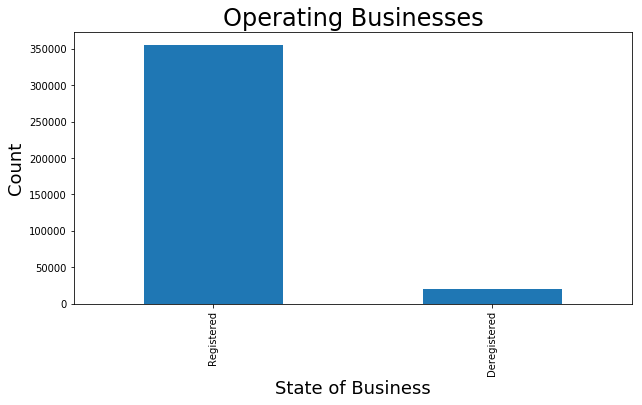

In [382]:
stat = status.value_counts().plot(kind="bar")
stat.set_xlabel("State of Business", fontsize=18)
stat.set_ylabel("Count", fontsize=18)
stat.set_title("Operating Businesses", fontsize=24)

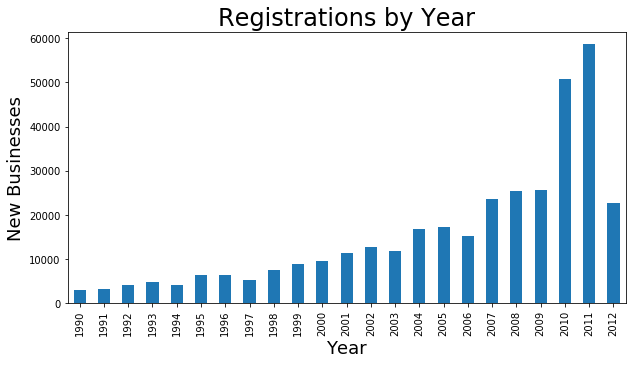

In [383]:
regy = start[start > "1990"].groupby(start.dt.year).count().plot(kind="bar")
regy.set_xlabel("Year", fontsize=18)
regy.set_ylabel("New Businesses", fontsize=18)
regy.set_title("Registrations by Year", fontsize=24)

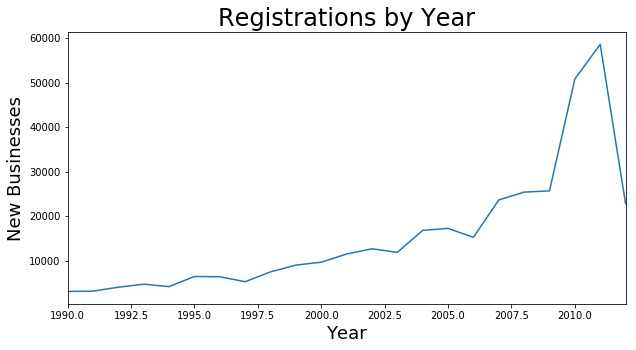

In [384]:
regy = start[start > "1990"].groupby(start.dt.year).count().plot()
regy.set_xlabel("Year", fontsize=18)
regy.set_ylabel("New Businesses", fontsize=18)
regy.set_title("Registrations by Year", fontsize=24)

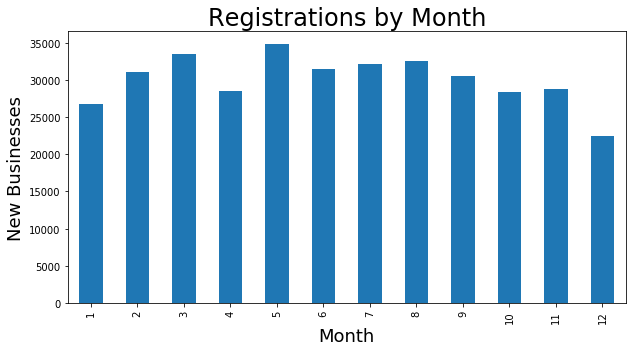

In [385]:
regm = start[start > "1788"].groupby(start.dt.month).count().plot("bar")
regm.set_xlabel("Month", fontsize=18)
regm.set_ylabel("New Businesses", fontsize=18)
regm.set_title("Registrations by Month", fontsize=24)

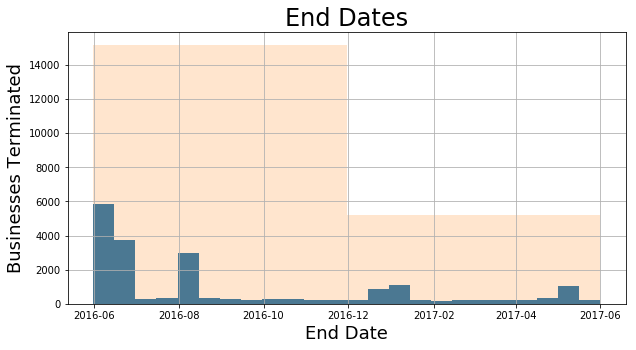

In [386]:
deaded[status=="Deregistered"].hist(bins=24)
ded = deaded[status=="Deregistered"].hist(bins=2, alpha=0.2)
ded.set_xlabel("End Date", fontsize=18)
ded.set_ylabel("Businesses Terminated", fontsize=18)
ded.set_title("End Dates", fontsize=24)

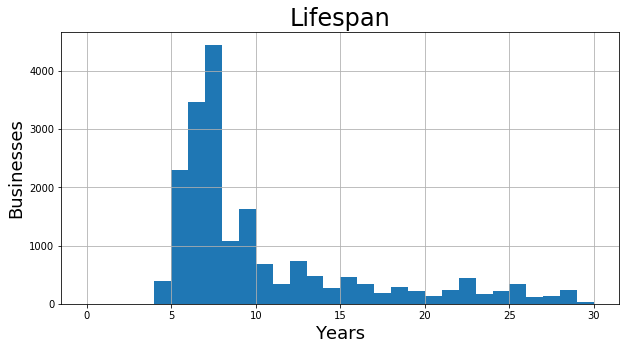

In [387]:
lives = deaded[status == "Deregistered"] - start[status == "Deregistered"]
lifeday = lives.astype('timedelta64[D]')
lifemonth = lifeday.divide(365).round(0)
span = lifemonth.hist(bins=30, range=(0, 30))
span.set_xlabel("Years", fontsize=18)
span.set_ylabel("Businesses", fontsize=18)
span.set_title("Lifespan", fontsize=24)

In [388]:
strings = name.tolist()
wordlist = []
for x in strings:
    y = x.split()
    wordlist.append(y)
words = list(itertools.chain.from_iterable(wordlist))

In [389]:
from collections import Counter
c = Counter(words)
comm = c.most_common(20)

In [390]:
commons = pd.DataFrame.from_records(comm)
commons

,0,1
0,&,36568
1,SERVICES,21599
2,AND,14028
3,THE,13167
4,CENTRE,7575
5,SERVICE,6827
6,AUSTRALIA,6665
7,SOLUTIONS,5910
8,CLEANING,5219
9,DESIGN,5162


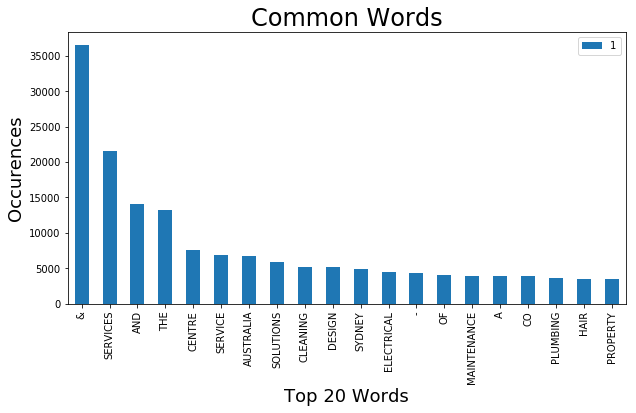

In [391]:
comms = commons.set_index(0).plot(kind="bar")
comms.set_xlabel("Top 20 Words", fontsize=18)
comms.set_ylabel("Occurences", fontsize=18)
comms.set_title("Common Words", fontsize=24)

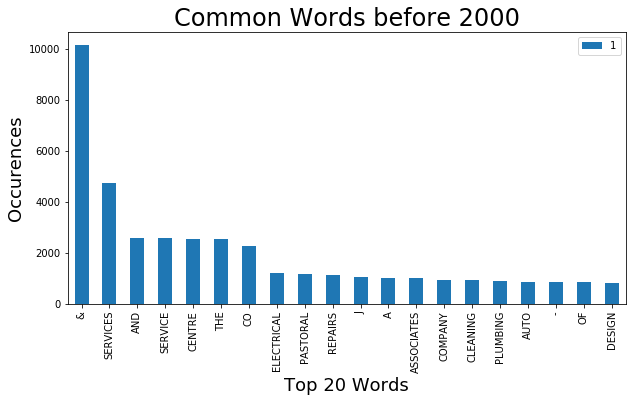

In [392]:
stringy = name[start<"2000"].tolist()
wordylist = []
for x in stringy:
    y = x.split()
    wordylist.append(y)
wordy = list(itertools.chain.from_iterable(wordylist))
cc = Counter(wordy)
comm = cc.most_common(20)
commons = pd.DataFrame.from_records(comm)
comms = commons.set_index(0).plot(kind="bar")
comms.set_xlabel("Top 20 Words", fontsize=18)
comms.set_ylabel("Occurences", fontsize=18)
comms.set_title("Common Words before 2000", fontsize=24)

In [393]:
stringy = name.tolist()
countlist = []
for x in stringy:
    y = x.count(" ") + 1
    countlist.append(int(y))
average = sum(countlist)/float(len(countlist))
average

3.0455924142899296

In [394]:
stringy = name.tolist()
letterlist = []
for x in stringy:
    y = x[:1].lower()
    letterlist.append(y)
lists = Counter(letterlist)
lists.most_common(10)

[('s', 36058),
 ('a', 33478),
 ('c', 30648),
 ('b', 27506),
 ('t', 27102),
 ('m', 25999),
 ('p', 21206),
 ('d', 15260),
 ('r', 15234),
 ('g', 14959)]

In [395]:
def alphabets(lettered):
    ddf = df.loc[name.str.startswith(lettered, na=False)]
    lives = ddf["BN_CANCEL_DT"] - ddf["BN_REG_DT"]
    lifeday = lives.astype('timedelta64[D]')
    lifemonth = lifeday.divide(365).round(0)
    stringy = lifemonth.tolist()
    average = sum(stringy)/len(stringy)
    return average

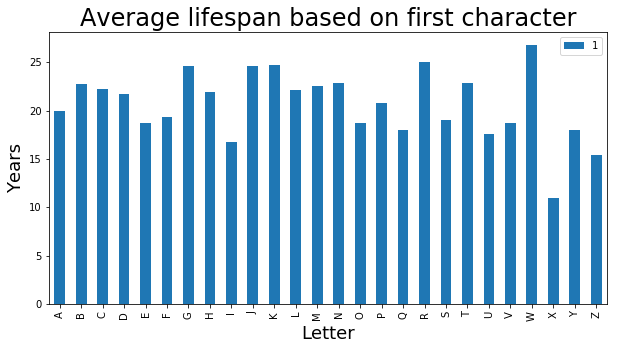

In [396]:
from string import ascii_uppercase
alist = []
for x in ascii_uppercase:
    alist.append((x, alphabets(x)))
adf = pd.DataFrame.from_records(alist)
adf = adf.set_index(0).plot(kind="bar")
adf.set_xlabel("Letter", fontsize=18)
adf.set_ylabel("Years", fontsize=18)
adf.set_title("Average lifespan based on first character", fontsize=24)